In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Task 3

In [24]:
# Load the dataset from CSV into a pandas DataFrame
data = pd.read_csv('./data/agaricus-lepiota.data', thousands=",").dropna()

# Display the first few rows of the dataset to understand its structure
data.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
# Get a summary of the numerical columns in the dataset (though all are categorical here)
data.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Task 4

In [26]:
# Group by 'habitat' and describe the 'edibility' for each habitat type
data[['habitat', 'edibility']].groupby('habitat').describe().transpose()

habitat              d     g    l    m     p    u    w
edibility count   3148  2148  832  292  1144  368  192
          unique     2     2    2    2     2    2    1
          top        e     e    p    e     p    p    e
          freq    1880  1408  592  256  1008  272  192

In [51]:
data.iloc[3]

edibility                   p
cap-shape                   x
cap-surface                 y
cap-color                   w
bruises?                    t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  n
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
Name: 3, dtype: object

Text(0, 0.5, 'Frequency')

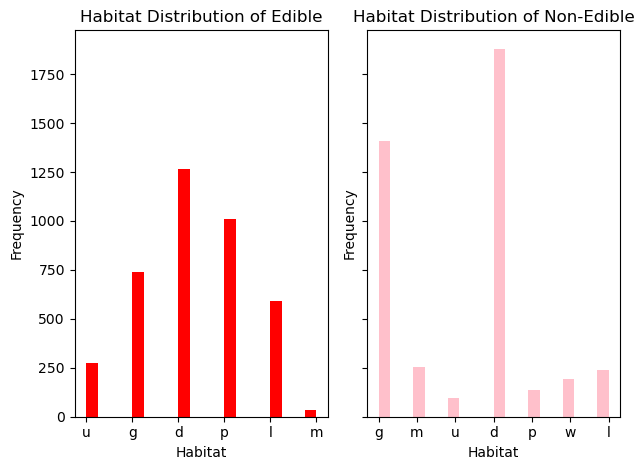

In [49]:
# Separate the data into edible ('p') and non-edible ('e') categories
edibility = data[data['edibility'] == 'p']
non_edibility = data[data['edibility'] == 'e']

# Create subplots to visualize habitat distribution for edible and non-edible mushrooms
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(edibility['habitat'], bins=20, color='red')
axs[0].set_title('Habitat Distribution of Edible')
axs[0].set_xlabel('Habitat')
axs[0].set_ylabel('Frequency')

axs[1].hist(non_edibility['habitat'], bins=20, color='pink')
axs[1].set_title('Habitat Distribution of Non-Edible')
axs[1].set_xlabel('Habitat')
axs[1].set_ylabel('Frequency')

In [ ]:
# Task 5

In [50]:
# Convert all categorical features into dummy variables
data_encoded = pd.get_dummies(data)

# Display the encoded dataframe
data_encoded

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
# Task 6

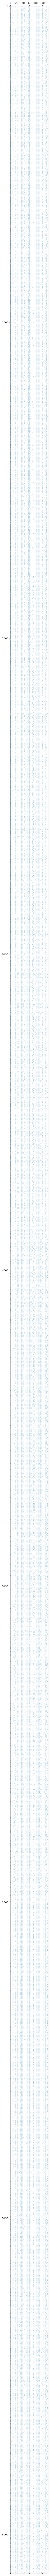

In [40]:
# Visualize the feature space using a sparse matrix plot, blue indicates non-zero value
plt.spy(data_encoded, markersize=0.1)
fig = plt.gcf()
fig.set_size_inches(60,180)
plt.plot()
plt.show()